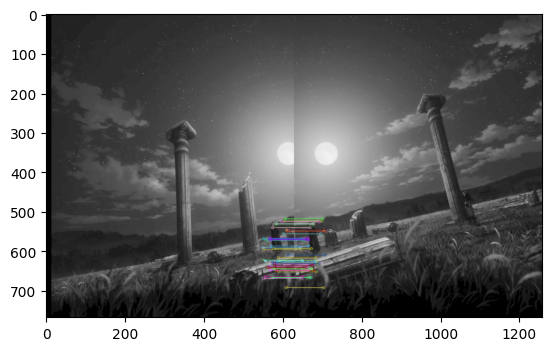

(<matplotlib.image.AxesImage at 0x7ebcfa2b4d90>, None)

In [18]:
# import required libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt

# read two input images as grayscale
img1 = cv2.imread('gbr1.png',0)
img2 = cv2.imread('gbr2.png',0)

# Initiate SIFT detector
sift = cv2.SIFT_create()

# detect and compute the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

# create BFMatcher object
bf = cv2.BFMatcher()

# Match descriptors.
matches = bf.match(des1,des2)

# sort the matches based on distance
matches = sorted(matches, key=lambda val: val.distance)

# Draw first 50 matches.
out = cv2.drawMatches(img1, kp1, img2, kp2, matches[:50], None, flags=2)
plt.imshow(out), plt.show()

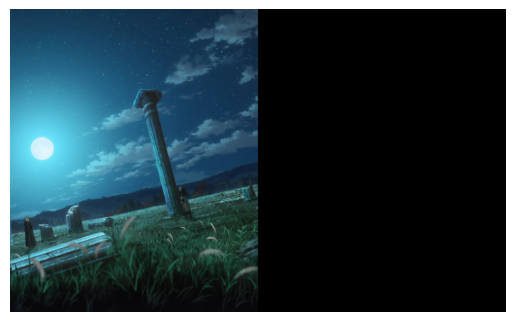

In [21]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Fungsi untuk melakukan image stitching
def image_stitching(image1_path, image2_path):
    # Baca gambar
    image1 = cv2.imread(image1_path)
    image2 = cv2.imread(image2_path)

    # Ubah gambar ke grayscale
    gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

    # Deteksi keypoints dan deskripsi menggunakan ORB
    orb = cv2.ORB_create()
    keypoints1, descriptors1 = orb.detectAndCompute(gray1, None)
    keypoints2, descriptors2 = orb.detectAndCompute(gray2, None)

    # Matcher menggunakan Brute Force
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    matches = bf.match(descriptors1, descriptors2)

    # Urutkan matches berdasarkan jarak
    matches = sorted(matches, key=lambda x: x.distance)

    # Ambil 10% terbaik dari matches
    num_good_matches = int(len(matches) * 0.1)
    matches = matches[:num_good_matches]

    # Dapatkan koordinat keypoints yang cocok
    points1 = np.float32([keypoints1[m.queryIdx].pt for m in matches]).reshape(-1, 1, 2)
    points2 = np.float32([keypoints2[m.trainIdx].pt for m in matches]).reshape(-1, 1, 2)

    # Temukan homography matrix
    H, _ = cv2.findHomography(points1, points2, cv2.RANSAC, 5.0)

    # Warp image pertama ke image kedua
    result = cv2.warpPerspective(image1, H, (image1.shape[1] + image2.shape[1], image1.shape[0]))

    # Gabungkan kedua gambar
    result[:image2.shape[0], :image2.shape[1]] = image2

    return result

# Path gambar yang ingin di-stitch
image1_path = "gbr1.png"
image2_path = "gbr2.png"

# Lakukan image stitching
result_image = image_stitching(image1_path, image2_path)

# Tampilkan gambar hasil stitching
plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()